In [2]:
import pandas as pd

itineraries = pd.read_parquet("./itineraries_gzip.parquet")
itineraries

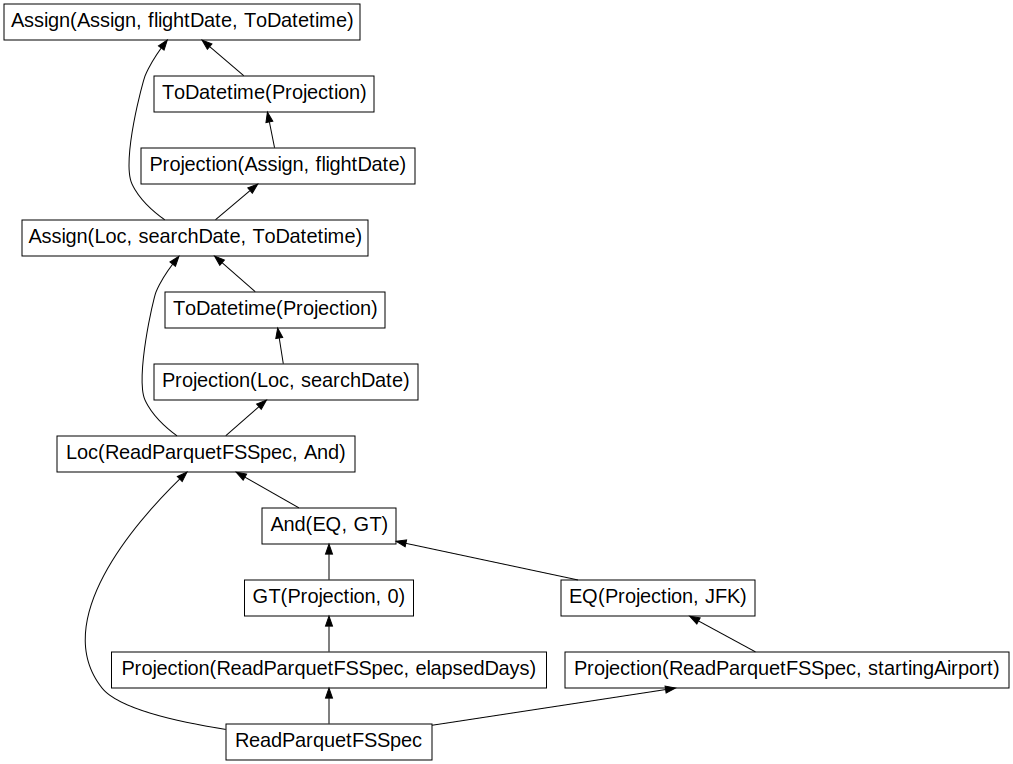

In [2]:
import dask.dataframe as dd

# Load the parquet file using dask
itineraries = dd.read_parquet("./itineraries_gzip.parquet")

# Convert to pandas DataFrame if needed
# itineraries_df = itineraries.compute()

# Display the DataFrame
# itineraries_df

msk = (itineraries["startingAirport"]=="JFK") & (itineraries['elapsedDays']>0)
itineraries = itineraries.loc[msk]

itineraries['searchDate'] = dd.to_datetime(itineraries['searchDate'], format='%Y-%m-%d')
itineraries['flightDate'] = dd.to_datetime(itineraries['flightDate'], format='%Y-%m-%d')
itineraries.visualize()

In [3]:
itineraries.head(2)

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
4007,75f72319e18bed5e783814db6a2dc470,2022-04-16,2022-04-17,JFK,ATL,QA0NA0MQ,PT9H52M,1,False,False,...,1650252180||1650282120,2022-04-17T23:23:00.000-04:00||2022-04-18T07:4...,IAD||ATL,JFK||IAD,Delta||Delta,DL||DL,Embraer 175||Airbus A319,5580||6120,221||541,coach||coach
4010,a3988e3dbc264d2691ceeebeba28d69e,2022-04-16,2022-04-17,JFK,ATL,MA0QA0MQ,PT11H32M,1,False,False,...,1650248340||1650281520,2022-04-17T22:19:00.000-04:00||2022-04-18T07:3...,IND||ATL,JFK||IND,Delta||Delta,DL||DL,Canadair Regional Jet 900||Boeing 737-900,8340||5520,653||434,coach||coach


itinerar

In [6]:
itineraries["startingAirport"].unique().compute()

In [5]:
itineraries_df = itineraries.compute()